In [29]:
# Package import
from __future__ import print_function, division

import numpy as np
import time
import os
import copy
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns 

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
from torch.autograd import Variable

import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

plt.ion()   # interactive mode

In [128]:
# Set the directories for the data and the CSV files that contain ids/labels

dir_images  = '/Users/Calvin/Desktop/2020Fall/Capstone/test_fishing_ground_5grp'


In [129]:
# CNN
# Data augmentation and input
data_transforms = {
    #'test': transforms.Compose([
    'test_fishing_ground': transforms.Compose([
        transforms.Resize((299,299)),
        #transforms.RandomCrop((80,120)),
        #transforms.RandomHorizontalFlip(0.5),
        #transforms.Grayscale(1),
        #torchvision.transforms.ColorJitter(brightness=0.1),
        #transforms.CenterCrop((70,150)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    }

data_dir = dir_images
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  #for x in ['test']}
                    for x in ['test_fishing_ground']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=False, 
                                              num_workers=4)
              #for x in ['test']}
                for x in ['test_fishing_ground']}
#dataset_sizes = {x: len(image_datasets[x]) for x in ['test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['test_fishing_ground']}
#class_names = image_datasets['test'].classes
class_names = image_datasets['test_fishing_ground'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

[['Banco Tino' 'Banco Tino']
 ['Banco Tino' 'Banco Tino']]


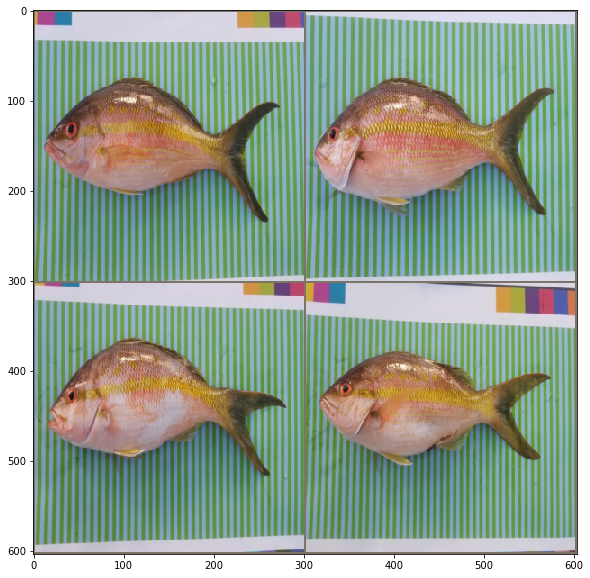

In [77]:
# Visualize Raw Data
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    
    std = np.array([0.229, 0.224, 0.225])
    
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title,loc='right')
    plt.pause(0.001)  # pause a bit so that plots are updated

i = 0
#for inputs, classes in dataloaders['test']:
for inputs, classes in dataloaders['test_fishing_ground']:
    inputs = inputs.to(device)
    classes = classes.to(device)
# Get a batch of training data
#inputs, classes = next(iter(dataloaders['test']))
inputs, classes = next(iter(dataloaders['test_fishing_ground']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs,nrow=2)

plt.rcParams['figure.figsize']=10,10

imshow(out, title=print(np.asarray([class_names[x] for x in classes]).reshape(2,2)))

In [81]:
def to_var(x, requires_grad=False, volatile=False):
    """
    Varialbe type that automatically choose cpu or cuda
    """
    if torch.cuda.is_available():
        x = x.to(device)
    return Variable(x, requires_grad=requires_grad, volatile=volatile)

# Prediction

#model = nn.DataParallel(models.resnet34(pretrained=False))
model = models.resnet34(pretrained=False)
model.load_state_dict(torch.load('./model_fg_grey_2.pt', map_location=torch.device('cpu')))
model.eval()

label = []
predict = []
#for inputs, labels in dataloaders['test']:
for inputs, labels in dataloaders['test_fishing_ground']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    for i in labels:
        label.append(i.numpy())
    
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    for j in preds:
        predict.append(j.numpy())

label = np.array(label)
predict = np.array(predict)

correct = np.sum(label == predict)
acc = correct / len(label)
print('Test Accuracy: {:.4f}'.format(acc))

Test Accuracy: 0.4910


In [6]:
pip install torchvision==0.7.0

     |████████████████████████████████| 387 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 97.4 MB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 15.7 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=544e4916d5e2e09616dd1fcafa55e8aea2359ca36720dae5b9d3bf61385012d3
  Stored in directory: /Users/Calvin/Library/Caches/pip/wheels/6e/9c/ed/4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
Successfully built future
  Attempting uninstall: torch
    Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
Note: you may need to restart the kernel to use updated packages.


In [130]:
def to_var(x, requires_grad=False, volatile=False):
    """
    Varialbe type that automatically choose cpu or cuda
    """
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, requires_grad=requires_grad, volatile=volatile)

# Prediction

#model = models.resnet34(pretrained=False)
model = models.inception_v3(pretrained=False)
#model = nn.DataParallel(models.resnet34(pretrained=False))
model.load_state_dict(torch.load('./model_fg_rgb_incep_5grp_2.pt', map_location=torch.device('cpu')))
model.eval()

label = []
predict = []
#for inputs, labels in dataloaders['test']:
for inputs, labels in dataloaders['test_fishing_ground']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    for i in labels:
        label.append(i.numpy())
    
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    for j in preds:
        predict.append(j.numpy())

label = np.array(label)
predict = np.array(predict)

correct = np.sum(label == predict)
acc = correct / len(label)
print('Test Accuracy: {:.4f}'.format(acc))

Test Accuracy: 0.6345


In [131]:
dataloaders_check = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=len(label),
                                             shuffle=False, 
                                              #num_workers=4) for x in ['test']}
                                                    num_workers=4) for x in ['test_fishing_ground']}

In [132]:
# Visualize Misclassification
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title,loc='right')
    plt.pause(0.001)  # pause a bit so that plots are updated
    
fg = ['Banco Tino', 'Grunt Patch', 'Harvest Cay', 'Jack Bank', 'Seco en Medio']
#fg = ['Banco Tino', 'Grunt Patch', 'Jack Bank_Harvest Cay', 'Seco en Medio']
#fg = ['Banco Tino', 'Jack Bank_Harvest Cay_Grunt Patch', 'Seco en Medio']
#fg = ['Banco Tino', 'Seco en Medio']
#fg = ['Grunt Patch', 'Harvest Cay', 'Jack Bank']

mis_cls = []

#for inputs, classes in dataloaders_check['test']:
for inputs, classes in dataloaders_check['test_fishing_ground']:
    for i in range(len(label)):
        if i in np.where(label != predict)[0]:
            img = inputs[i]
            cls = classes[i] 
            mis_cls.append(str(np.asarray(class_names[cls]))+'->'+str(fg[predict[i]]))
            #print (i)
            #plt.rcParams['figure.figsize']=4,4
            #_ = imshow(img, title=print('label:', np.asarray(class_names[cls]), 'predict:', fg[predict[i]]))
            #plt.show()

mis_cls

In [133]:
number_list = np.array(mis_cls)

(unique, counts) = np.unique(number_list, return_counts=True)
freq = np.asarray((unique, counts)).T
freq

array([['Banco Tino->Grunt Patch', '7'],
       ['Banco Tino->Harvest Cay', '27'],
       ['Banco Tino->Jack Bank', '30'],
       ['Banco Tino->Seco en Medio', '3'],
       ['Grunt Patch->Harvest Cay', '81'],
       ['Grunt Patch->Jack Bank', '10'],
       ['Grunt Patch->Seco en Medio', '1'],
       ['Harvest Cay->Grunt Patch', '2'],
       ['Harvest Cay->Jack Bank', '4'],
       ['Harvest Cay->Seco en Medio', '3'],
       ['Jack Bank->Harvest Cay', '57'],
       ['Seco en Medio->Jack Bank', '2']], dtype='<U26')